# Capstone Project - The Battle of the Neighborhoods


# Introduction: Business Problem

This project aims to select the safest borough in London based on the total crimes, explore the neighborhoods of that borough to find the 10 most common venues in each neighborhood and finally cluster the neighborhoods using k-mean clustering.


This report will be targeted to people who are looking to relocate to India. Inorder to finalise a neighborhood to hunt for an apartment, safety is considered as a top concern when moving to a new place. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there. The crime statistics will provide an insight into this issue.

We will focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood suited to an individual's needs can be selected.

# Preprocessing a real world data set from Kaggle showing the india stolen cases from 2001 to 2010

data set url:https://www.kaggle.com/rajanand/crime-in-india#10_Property_stolen_and_recovered.csv

In [135]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifyi

# Define Foursquare Credentials and Version


In [136]:
CLIENT_ID = 'CYGKNYGRYSW2RKIPZDVHPW0T5B2U4LBS3ICV45ZOHNJKLTBC' # your Foursquare ID
CLIENT_SECRET = 'YAVMJD1EDRBBRSTUP0BM0FHIVSUNSR1HLX2AY5YLBKCR0PTP' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CYGKNYGRYSW2RKIPZDVHPW0T5B2U4LBS3ICV45ZOHNJKLTBC
CLIENT_SECRET:YAVMJD1EDRBBRSTUP0BM0FHIVSUNSR1HLX2AY5YLBKCR0PTP


In [137]:
df = pd.read_csv("indiastolen.csv")

In [138]:

# View the top rows of the dataset
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


Accessing the most recent crime rates (2010)

In [139]:
df.shape

(2449, 8)

Change the column names

In [140]:
df.columns = ['Area', 'Year','Group','Sub-group-name','Cased_recoverd','Cased_stolen','Value_recovered', 'Value_stolen']
df.head()

,Area,Year,Group,Sub-group-name,Cased_recoverd,Cased_stolen,Value_recovered,Value_stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
Area               2449 non-null object
Year               2449 non-null int64
Group              2449 non-null object
Sub-group-name     2449 non-null object
Cased_recoverd     2449 non-null int64
Cased_stolen       2449 non-null int64
Value_recovered    2449 non-null int64
Value_stolen       2449 non-null int64
dtypes: int64(5), object(3)
memory usage: 153.2+ KB


In [142]:
df['Area'].value_counts()

Andhra Pradesh               70
Maharashtra                  70
Haryana                      70
Tripura                      70
Chandigarh                   70
Kerala                       70
Madhya Pradesh               70
Jammu & Kashmir              70
Delhi                        70
Assam                        70
Bihar                        70
Tamil Nadu                   70
Rajasthan                    70
Nagaland                     70
Andaman & Nicobar Islands    70
Goa                          70
Chhattisgarh                 70
Jharkhand                    70
Himachal Pradesh             70
Uttar Pradesh                70
Dadra & Nagar Haveli         70
West Bengal                  70
Uttarakhand                  70
Sikkim                       70
Daman & Diu                  70
Karnataka                    70
Odisha                       70
Manipur                      70
Puducherry                   70
Gujarat                      70
Mizoram                      70
Punjab  

##The total crimes per major category

In [143]:
df['Group'].value_counts()

Dacoity -Property                      350
Criminal Breach of Trust - Property    350
Burglary - Property                    350
Theft - Property                       350
Other heads of Property                350
Robbery - Property                     350
Total Property                         349
Name: Group, dtype: int64

In [144]:
df['Sub-group-name'].value_counts()

4. Theft                                350
5. Criminal Breach of Trust             350
3. Burglary                             350
6. Other Property                       350
2. Robbery                              350
1. Dacoity                              350
7. Total Property Stolen & Recovered    349
Name: Sub-group-name, dtype: int64

In [145]:
df['Area'].value_counts()

Andhra Pradesh               70
Maharashtra                  70
Haryana                      70
Tripura                      70
Chandigarh                   70
Kerala                       70
Madhya Pradesh               70
Jammu & Kashmir              70
Delhi                        70
Assam                        70
Bihar                        70
Tamil Nadu                   70
Rajasthan                    70
Nagaland                     70
Andaman & Nicobar Islands    70
Goa                          70
Chhattisgarh                 70
Jharkhand                    70
Himachal Pradesh             70
Uttar Pradesh                70
Dadra & Nagar Haveli         70
West Bengal                  70
Uttarakhand                  70
Sikkim                       70
Daman & Diu                  70
Karnataka                    70
Odisha                       70
Manipur                      70
Puducherry                   70
Gujarat                      70
Mizoram                      70
Punjab  

In [146]:
india_crime = pd.pivot_table(df,values=['Cased_stolen'],
                               index=['Area'],
                               columns=['Sub-group-name'],
                               aggfunc=np.sum,fill_value=0)
india_crime.head()

Cased_stolen                                  \
Sub-group-name              1. Dacoity 2. Robbery 3. Burglary 4. Theft   
Area                                                                     
Andaman & Nicobar Islands            9         71         722      965   
Andhra Pradesh                    1620       6185       79444   226763   
Arunachal Pradesh                  227        714        2382     4362   
Assam                             3599       5723       27600    67772   
Bihar                            10002      21016       32898   119387   

                                                                         \
Sub-group-name            5. Criminal Breach of Trust 6. Other Property   
Area                                                                      
Andaman & Nicobar Islands                          64                 0   
Andhra Pradesh                                   3581              3818   
Arunachal Pradesh                                 380               251   
Assam                                            6204             11882   
Bihar                                           12069             10548   

                                                                
Sub-group-name            7. Total Property Stolen & Recovered  
Area                                                            
Andaman & Nicobar Islands                                 1831  
Andhra Pradesh                                          321411  
Arunachal Pradesh                                         8316  
Assam                                                   122780  
Bihar                                                   205920

In [147]:
india_crime.reset_index(inplace = True)

In [148]:
india_crime.columns

MultiIndex([(        'Area',                                     ''),
            ('Cased_stolen',                           '1. Dacoity'),
            ('Cased_stolen',                           '2. Robbery'),
            ('Cased_stolen',                          '3. Burglary'),
            ('Cased_stolen',                             '4. Theft'),
            ('Cased_stolen',          '5. Criminal Breach of Trust'),
            ('Cased_stolen',                    '6. Other Property'),
            ('Cased_stolen', '7. Total Property Stolen & Recovered')],
           names=[None, 'Sub-group-name'])

In [149]:
india_crime['Total'] = india_crime.sum(axis=1)
india_crime.head(10)

Area Cased_stolen                         \
Sub-group-name                              1. Dacoity 2. Robbery 3. Burglary   
0               Andaman & Nicobar Islands            9         71         722   
1                          Andhra Pradesh         1620       6185       79444   
2                       Arunachal Pradesh          227        714        2382   
3                                   Assam         3599       5723       27600   
4                                   Bihar        10002      21016       32898   
5                              Chandigarh           22        266        2427   
6                            Chhattisgarh         1336       4231       37774   
7                    Dadra & Nagar Haveli           29         26         344   
8                             Daman & Diu           29         14         423   
9                                   Delhi          320       5291       20421   

                                                                       \
Sub-group-name 4. Theft 5. Criminal Breach of Trust 6. Other Property   
0                   965                          64                 0   
1                226763                        3581              3818   
2                  4362                         380               251   
3                 67772                        6204             11882   
4                119387                       12069             10548   
5                 15423                         352              1370   
6                 52217                        1276              3022   
7                   633                         143               146   
8                   461                          54                47   
9                186615                        4047             28653   

                                                      Total  
Sub-group-name 7. Total Property Stolen & Recovered          
0                                              1831    3662  
1                                            321411  642822  
2                                              8316   16632  
3                                            122780  245560  
4                                            205920  411840  
5                                             19860   39720  
6                                             99856  199712  
7                                              1321    2642  
8                                              1028    2056  
9                                            245347  490694

In [150]:
india_crime.columns = india_crime.columns.map(''.join)
india_crime.head()

,Area,Cased_stolen1. Dacoity,Cased_stolen2. Robbery,Cased_stolen3. Burglary,Cased_stolen4. Theft,Cased_stolen5. Criminal Breach of Trust,Cased_stolen6. Other Property,Cased_stolen7. Total Property Stolen & Recovered,Total
0,Andaman & Nicobar Islands,9,71,722,965,64,0,1831,3662
1,Andhra Pradesh,1620,6185,79444,226763,3581,3818,321411,642822
2,Arunachal Pradesh,227,714,2382,4362,380,251,8316,16632
3,Assam,3599,5723,27600,67772,6204,11882,122780,245560
4,Bihar,10002,21016,32898,119387,12069,10548,205920,411840


In [151]:
india_crime.columns


Index(['Area', 'Cased_stolen1. Dacoity', 'Cased_stolen2. Robbery',
       'Cased_stolen3. Burglary', 'Cased_stolen4. Theft',
       'Cased_stolen5. Criminal Breach of Trust',
       'Cased_stolen6. Other Property',
       'Cased_stolen7. Total Property Stolen & Recovered', 'Total'],
      dtype='object')

In [152]:
india_crime = india_crime.drop('Cased_stolen7. Total Property Stolen & Recovered', axis =1 )

In [153]:
india_crime.columns = ['Area', 'Dacolty', 'Robbery', 'Burglary', 'Thef', 'Criminal_breach_of_trust', 'other', 'Total']

In [154]:
india_crime

,Area,Dacolty,Robbery,Burglary,Thef,Criminal_breach_of_trust,other,Total
0,Andaman & Nicobar Islands,9,71,722,965,64,0,3662
1,Andhra Pradesh,1620,6185,79444,226763,3581,3818,642822
2,Arunachal Pradesh,227,714,2382,4362,380,251,16632
3,Assam,3599,5723,27600,67772,6204,11882,245560
4,Bihar,10002,21016,32898,119387,12069,10548,411840
5,Chandigarh,22,266,2427,15423,352,1370,39720
6,Chhattisgarh,1336,4231,37774,52217,1276,3022,199712
7,Dadra & Nagar Haveli,29,26,344,633,143,146,2642
8,Daman & Diu,29,14,423,461,54,47,2056
9,Delhi,320,5291,20421,186615,4047,28653,490694


In [155]:
india_crime['Total'] = india_crime.sum(axis=1)
india_crime.head(10)

,Area,Dacolty,Robbery,Burglary,Thef,Criminal_breach_of_trust,other,Total
0,Andaman & Nicobar Islands,9,71,722,965,64,0,5493
1,Andhra Pradesh,1620,6185,79444,226763,3581,3818,964233
2,Arunachal Pradesh,227,714,2382,4362,380,251,24948
3,Assam,3599,5723,27600,67772,6204,11882,368340
4,Bihar,10002,21016,32898,119387,12069,10548,617760
5,Chandigarh,22,266,2427,15423,352,1370,59580
6,Chhattisgarh,1336,4231,37774,52217,1276,3022,299568
7,Dadra & Nagar Haveli,29,26,344,633,143,146,3963
8,Daman & Diu,29,14,423,461,54,47,3084
9,Delhi,320,5291,20421,186615,4047,28653,736041


In [156]:
india_crime = india_crime.drop('Total', axis =1 )

In [157]:
india_crime['Total'] = india_crime.sum(axis=1)
india_crime.head(10)

,Area,Dacolty,Robbery,Burglary,Thef,Criminal_breach_of_trust,other,Total
0,Andaman & Nicobar Islands,9,71,722,965,64,0,1831
1,Andhra Pradesh,1620,6185,79444,226763,3581,3818,321411
2,Arunachal Pradesh,227,714,2382,4362,380,251,8316
3,Assam,3599,5723,27600,67772,6204,11882,122780
4,Bihar,10002,21016,32898,119387,12069,10548,205920
5,Chandigarh,22,266,2427,15423,352,1370,19860
6,Chhattisgarh,1336,4231,37774,52217,1276,3022,99856
7,Dadra & Nagar Haveli,29,26,344,633,143,146,1321
8,Daman & Diu,29,14,423,461,54,47,1028
9,Delhi,320,5291,20421,186615,4047,28653,245347


# Scraping additional information of the different area in India from page 


In [158]:
# getting data from internet
wikipedia_link='https://www.mapsofworld.com/lat_long/india-lat-long.html'
raw_wikipedia_page= requests.get(wikipedia_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   India Latitude and Longitude Map
  </title>
  <meta content="Latitude and longitude of India is 21.0000 degrees N and 78.0000 degrees E. Map showing the geographic coordinates of India states, major cities and towns." name="Description"/>
  <meta content="India Latitude and Longitude Map, Latitude and Longitude of India, India's latitude and Longitude, India Lat Long Map, India Latitude Longitude with Map, Map of India with Latitude and Longitude." name="Keywords"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="https://www.mapsofworld.com/lat_long/maps/India-lat-long.jpg" name="twitter:src">
   <meta content="@Mapsofworld" name="twitter:site"/>
   <meta content="India Latitude and Longitude Map" name="twitter:title">
    <meta content="Latitude and longitude of India is 21.0000 degrees N and 78.0000 degrees E. Map showing the geographic coordinates of India states

# bring data in this page and make it excel file https://www.mapsofworld.com/lat_long/india-lat-long.html

read excel file

In [159]:
India_table = pd.read_excel("indiaarea.xlsx")
India_table.head()

,location,latitude,longtitude,Location,Latitude,Longitude
0,Abhayapuri,26°24'N,90°38'E,NaN,NaN,NaN
1,Abohar,30°10'N,74°10'E,NaN,NaN,NaN
2,Abu,24°41'N,72°50'E,NaN,NaN,NaN
3,Achalpur,21°22'N,77°32'E,NaN,NaN,NaN
4,Acher,23°10'N,72°32'E,NaN,NaN,NaN


In [160]:
India_table

,location,latitude,longtitude,Location,Latitude,Longitude
0,Abhayapuri,26°24'N,90°38'E,NaN,NaN,NaN
1,Abohar,30°10'N,74°10'E,NaN,NaN,NaN
2,Abu,24°41'N,72°50'E,NaN,NaN,NaN
3,Achalpur,21°22'N,77°32'E,NaN,NaN,NaN
4,Acher,23°10'N,72°32'E,NaN,NaN,NaN
...,...,...,...,...,...,...
1631,Yadgir,16°45'N,77°5'E,NaN,NaN,NaN
1632,Yamuna,25°30n,81°53'E,NaN,NaN,NaN
1633,Yamunagar,30°7'N,77°17'E,NaN,NaN,NaN
1634,Yavatmal,20°20'N,78°15'E,NaN,NaN,NaN


In [161]:
India_table=India_table.drop('Location', axis=1)

In [162]:
India_table=India_table.drop('Latitude', axis=1)

In [163]:
India_table.columns

Index(['location', 'latitude', 'longtitude', 'Longitude'], dtype='object')

In [164]:
India_table=India_table.drop('Longitude', axis=1)

# Check the type of the newly created table

In [165]:
type(India_table)

pandas.core.frame.DataFrame

# check what area has no longitude data

In [167]:
India_table = India_table.rename(columns={"location": "Area"})

# We can combine both the data frames together

In [171]:
Id_crime = pd.merge(india_crime, India_table, on='Area')

In [172]:
Id_crime

,Area,Dacolty,Robbery,Burglary,Thef,Criminal_breach_of_trust,other,Total,latitude,longtitude
0,Andhra Pradesh,1620,6185,79444,226763,3581,3818,321411,18°00'N,79°00'E
1,Arunachal Pradesh,227,714,2382,4362,380,251,8316,28°00'N,95°00'E
2,Assam,3599,5723,27600,67772,6204,11882,122780,26°00'N,93°00'E
3,Bihar,10002,21016,32898,119387,12069,10548,205920,25°05'N,85°40'E
4,Bihar,10002,21016,32898,119387,12069,10548,205920,25°00'N,86°00'E
5,Chandigarh,22,266,2427,15423,352,1370,19860,30°43'N,76°47'E
6,Chhattisgarh,1336,4231,37774,52217,1276,3022,99856,22°00'N,82°00'E
7,Dadra & Nagar Haveli,29,26,344,633,143,146,1321,20°05'N,73°00'E
8,Delhi,320,5291,20421,186615,4047,28653,245347,28°38'N,77°17'E
9,Goa,45,235,2871,5928,336,479,9894,15°33'N,73°59'E


# drop missing value

In [173]:
Id_crime.dropna()

,Area,Dacolty,Robbery,Burglary,Thef,Criminal_breach_of_trust,other,Total,latitude,longtitude
0,Andhra Pradesh,1620,6185,79444,226763,3581,3818,321411,18°00'N,79°00'E
1,Arunachal Pradesh,227,714,2382,4362,380,251,8316,28°00'N,95°00'E
2,Assam,3599,5723,27600,67772,6204,11882,122780,26°00'N,93°00'E
3,Bihar,10002,21016,32898,119387,12069,10548,205920,25°05'N,85°40'E
4,Bihar,10002,21016,32898,119387,12069,10548,205920,25°00'N,86°00'E
5,Chandigarh,22,266,2427,15423,352,1370,19860,30°43'N,76°47'E
6,Chhattisgarh,1336,4231,37774,52217,1276,3022,99856,22°00'N,82°00'E
7,Dadra & Nagar Haveli,29,26,344,633,143,146,1321,20°05'N,73°00'E
8,Delhi,320,5291,20421,186615,4047,28653,245347,28°38'N,77°17'E
9,Goa,45,235,2871,5928,336,479,9894,15°33'N,73°59'E


# Methodology 


Exploratory Data Analysis: Visualise the crime rates in the London area to idenity the safest borough and extract the neighborhoods in that area to find the 10 most common venues in each neighborhood.

Modelling: To help people find similar neighborhoods in the safest area we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

In [174]:
india_crime.describe()

,Dacolty,Robbery,Burglary,Thef,Criminal_breach_of_trust,other,Total
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1376.514286,5346.428571,25736.342857,78369.742857,2947.542857,5854.685714,119631.257143
std,2154.461941,6861.314298,33766.808039,100079.611757,3909.531026,9001.078801,148549.430558
min,3.000000,0.000000,31.000000,101.000000,1.000000,0.000000,184.000000
25%,40.500000,219.500000,1740.500000,4483.500000,199.500000,512.500000,7778.000000
50%,383.000000,1439.000000,14003.000000,40199.000000,1276.000000,2058.000000,75591.000000
75%,1873.500000,7105.500000,37958.500000,152556.000000,3960.000000,8234.500000,210926.000000
max,10002.000000,26061.000000,144520.000000,453712.000000,15896.000000,41701.000000,688407.000000


In [175]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.2.1


In [176]:
Id_crime.columns = list(map(str, Id_crime.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in Id_crime.columns)

True

# Sort the total crimes in descenting order to see 5 boroughs with the highest number of crimes

In [177]:
Id_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = Id_crime.head() 
df_top5

,Area,Dacolty,Robbery,Burglary,Thef,Criminal_breach_of_trust,other,Total,latitude,longtitude
19,Maharashtra,6517,26061,144520,453712,15896,41701,688407,20°30'N,75°30'E
18,Madhya Pradesh,1430,18420,116445,218058,4306,8103,366762,22°50'N,78°0'E
0,Andhra Pradesh,1620,6185,79444,226763,3581,3818,321411,18°00'N,79°00'E
29,Uttar Pradesh,2300,18513,42143,203722,8137,5170,279985,27°0'N,80°0'E
11,Gujarat,3225,11381,49852,179942,11748,10882,267030,23°20'N,71°00'E


# Visualize the five area with the highest number of crimes

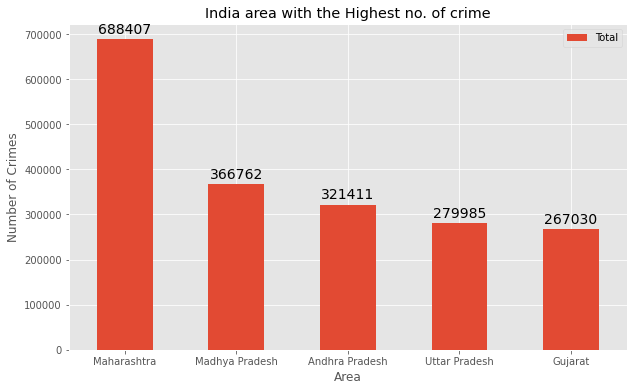

In [178]:
df_tt = df_top5[['Area','Total']]

df_tt.set_index('Area',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Area') # add y-label to the plot
ax.set_title('India area with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

# so maharashtra is fooking dagerous boi

In [179]:
Id_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = Id_crime.head() 
df_bot5

,Area,Dacolty,Robbery,Burglary,Thef,Criminal_breach_of_trust,other,Total,latitude,longtitude
7,Dadra & Nagar Haveli,29,26,344,633,143,146,1321,20°05'N,73°00'E
27,Sikkim,6,51,720,806,43,31,1657,27°50'N,88°30'E
23,Nagaland,103,762,871,2752,104,815,5407,26°0'N,94°30'E
20,Manipur,39,73,650,3212,272,1546,5792,25°0'N,94°0'E
28,Tripura,208,665,1933,3517,271,646,7240,24°0'N,92°0'E


In [180]:
df_bot5.columns

Index(['Area', 'Dacolty', 'Robbery', 'Burglary', 'Thef',
       'Criminal_breach_of_trust', 'other', 'Total', 'latitude', 'longtitude'],
      dtype='object')

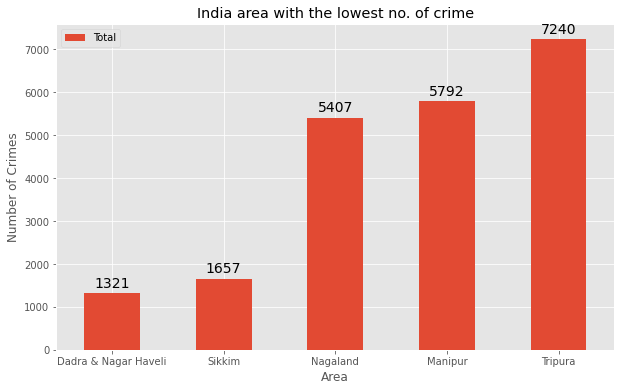

In [181]:
df_bt = df_bot5[['Area','Total']]

df_bt.set_index('Area',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Area') # add y-label to the plot
ax.set_title('India area with the lowest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

# Hence we will focus on the next area with the least crime i.e. Dadra & Nagar Haveli


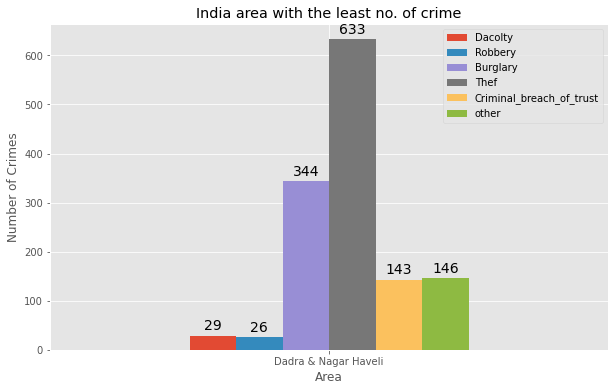

In [182]:
df_bc1 =  df_bot5[df_bot5['Area'] == 'Dadra & Nagar Haveli']

df_bc = df_bc1[['Area', 'Dacolty', 'Robbery', 'Burglary', 'Thef',
       'Criminal_breach_of_trust', 'other']]


df_bc.set_index('Area',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Area') # add y-label to the plot
ax.set_title('India area with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [183]:
Neighborhood = ['Daman District','Diu District','Dadra and Nagar Haveli District']

Area = ['Dadra & Nagar Haveli','Dadra & Nagar Haveli','Dadra & Nagar Haveli']

Latitude = ["","",""]
Longitude = ["","",""]

df_neigh = {'Neighborhood': Neighborhood,'Area':Area,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Area', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Area,Latitude,Longitude
0,Daman District,Dadra & Nagar Haveli,,
1,Diu District,Dadra & Nagar Haveli,,
2,Dadra and Nagar Haveli District,Dadra & Nagar Haveli,,


# Find the Co-ordiantes of each Neighborhood in Dadra & Nagar Haveli¶

In [186]:
address = 'Daman District,India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

21.204498 72.7991867


In [188]:
address = 'Diu District,India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

20.7159534 70.9785005


In [189]:
address = 'Dadra and Nagar Haveli District,India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

20.2734505 73.0064718


In [192]:
Neighborhood = ['Daman District','Diu District','Dadra and Nagar Haveli District']

Area = ['Dadra & Nagar Haveli','Dadra & Nagar Haveli','Dadra & Nagar Haveli']

Latitude = [21.204498,20.7159534,20.2734505]
Longitude = [72.7991867,70.9785005,73.0064718]

df_neigh = {'Neighborhood': Neighborhood,'Area':Area,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Area', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Area,Latitude,Longitude
0,Daman District,Dadra & Nagar Haveli,21.204498,72.799187
1,Diu District,Dadra & Nagar Haveli,20.715953,70.978500
2,Dadra and Nagar Haveli District,Dadra & Nagar Haveli,20.273450,73.006472


In [193]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Area'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

# Modelling 

Finding all the venues within a 500 meter radius of each neighborhood.

Perform one hot ecoding on the venues data.

Grouping the venues by the neighborhood and calculating their mean.

Performing a K-means clustering (Defining K = 5)

In [194]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [195]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Daman District
Diu District
Dadra and Nagar Haveli District


In [196]:
print(kut_venues.shape)
kut_venues.head()

(10, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Daman District,21.204498,72.799187,Sugar n spice,21.206529,72.797985,Fast Food Restaurant
1,Daman District,21.204498,72.799187,Shreeji Unique Art,21.208775,72.799082,Art Gallery
2,Diu District,20.715953,70.978500,HDFC Bank,20.714364,70.977174,ATM
3,Diu District,20.715953,70.978500,Hotel Hemal Garden,20.713700,70.979000,Hotel
4,Diu District,20.715953,70.978500,Diu Fish Market,20.718267,70.980467,Fish & Chips Shop


In [197]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Dadra and Nagar Haveli District,4,4,4,4,4,4
Daman District,2,2,2,2,2,2
Diu District,4,4,4,4,4,4


# One hot encoding

In [198]:
# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,ATM,Art Gallery,Asian Restaurant,Bakery,Bus Station,Café,Fast Food Restaurant,Fish & Chips Shop,Food Truck,Hotel
0,Daman District,0,0,0,0,0,0,1,0,0,0
1,Daman District,0,1,0,0,0,0,0,0,0,0
2,Diu District,1,0,0,0,0,0,0,0,0,0
3,Diu District,0,0,0,0,0,0,0,0,0,1
4,Diu District,0,0,0,0,0,0,0,1,0,0


# Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [199]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,ATM,Art Gallery,Asian Restaurant,Bakery,Bus Station,Café,Fast Food Restaurant,Fish & Chips Shop,Food Truck,Hotel
0,Dadra and Nagar Haveli District,0.00,0.0,0.25,0.25,0.00,0.25,0.0,0.00,0.25,0.00
1,Daman District,0.00,0.5,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.00
2,Diu District,0.25,0.0,0.00,0.00,0.25,0.00,0.0,0.25,0.00,0.25


In [200]:
kut_grouped.shape

(3, 11)

In [201]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Dadra and Nagar Haveli District----
              venue  freq
0  Asian Restaurant  0.25
1            Bakery  0.25
2              Café  0.25
3        Food Truck  0.25
4               ATM  0.00


----Daman District----
                  venue  freq
0           Art Gallery   0.5
1  Fast Food Restaurant   0.5
2                   ATM   0.0
3      Asian Restaurant   0.0
4                Bakery   0.0


----Diu District----
               venue  freq
0                ATM  0.25
1        Bus Station  0.25
2  Fish & Chips Shop  0.25
3              Hotel  0.25
4        Art Gallery  0.00




# Create a data frame of the venues

In [202]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [203]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dadra and Nagar Haveli District,Food Truck,Café,Bakery,Asian Restaurant,Hotel,Fish & Chips Shop,Fast Food Restaurant,Bus Station,Art Gallery,ATM
1,Daman District,Fast Food Restaurant,Art Gallery,Hotel,Food Truck,Fish & Chips Shop,Café,Bus Station,Bakery,Asian Restaurant,ATM
2,Diu District,Hotel,Fish & Chips Shop,Bus Station,ATM,Food Truck,Fast Food Restaurant,Café,Bakery,Asian Restaurant,Art Gallery


# Clustering similar neighborhoods together using k - means clustering¶

In [205]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 2

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0], dtype=int32)

In [206]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Daman District,Dadra & Nagar Haveli,21.204498,72.799187,1,Fast Food Restaurant,Art Gallery,Hotel,Food Truck,Fish & Chips Shop,Café,Bus Station,Bakery,Asian Restaurant,ATM
1,Diu District,Dadra & Nagar Haveli,20.715953,70.978500,0,Hotel,Fish & Chips Shop,Bus Station,ATM,Food Truck,Fast Food Restaurant,Café,Bakery,Asian Restaurant,Art Gallery
2,Dadra and Nagar Haveli District,Dadra & Nagar Haveli,20.273450,73.006472,0,Food Truck,Café,Bakery,Asian Restaurant,Hotel,Fish & Chips Shop,Fast Food Restaurant,Bus Station,Art Gallery,ATM


In [207]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 15 columns):
Neighborhood              3 non-null object
Area                      3 non-null object
Latitude                  3 non-null float64
Longitude                 3 non-null float64
Cluster Labels            3 non-null int32
1st Most Common Venue     3 non-null object
2nd Most Common Venue     3 non-null object
3rd Most Common Venue     3 non-null object
4th Most Common Venue     3 non-null object
5th Most Common Venue     3 non-null object
6th Most Common Venue     3 non-null object
7th Most Common Venue     3 non-null object
8th Most Common Venue     3 non-null object
9th Most Common Venue     3 non-null object
10th Most Common Venue    3 non-null object
dtypes: float64(2), int32(1), object(12)
memory usage: 476.0+ bytes


In [208]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)

In [209]:
kut_merged.shape

(3, 15)

In [210]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [211]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 15 columns):
Neighborhood              3 non-null object
Area                      3 non-null object
Latitude                  3 non-null float64
Longitude                 3 non-null float64
Cluster Labels            3 non-null int64
1st Most Common Venue     3 non-null object
2nd Most Common Venue     3 non-null object
3rd Most Common Venue     3 non-null object
4th Most Common Venue     3 non-null object
5th Most Common Venue     3 non-null object
6th Most Common Venue     3 non-null object
7th Most Common Venue     3 non-null object
8th Most Common Venue     3 non-null object
9th Most Common Venue     3 non-null object
10th Most Common Venue    3 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 384.0+ bytes


# Visualize the clusters¶

In [212]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster. 

# Analysis 

Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.

Examine the first cluster

In [213]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Diu District,Dadra & Nagar Haveli,20.715953,70.978500,0,Hotel,Fish & Chips Shop,Bus Station,ATM,Food Truck,Fast Food Restaurant,Café,Bakery,Asian Restaurant,Art Gallery
2,Dadra and Nagar Haveli District,Dadra & Nagar Haveli,20.273450,73.006472,0,Food Truck,Café,Bakery,Asian Restaurant,Hotel,Fish & Chips Shop,Fast Food Restaurant,Bus Station,Art Gallery,ATM


The first cluster has one neighborhood which consists of Venues such as Hote, and Food Truck.

In [214]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Daman District,Dadra & Nagar Haveli,21.204498,72.799187,1,Fast Food Restaurant,Art Gallery,Hotel,Food Truck,Fish & Chips Shop,Café,Bus Station,Bakery,Asian Restaurant,ATM



The second cluster has one neighborhood which consists of Venues such as Fast Food Restaurant, Hotel, and Art Gallery.